In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt


## Dataset Source
## https://data.gov.in/resources/district-wise-season-wise-crop-production-statistics-1997

data = pd.read_excel("D:\\GitHub\\Projects\\Coursera_Capstone\\India_crop_data.xlsx", sheet_name='apy' )

data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Indiain State Names
['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'] 

In [4]:
# Select the State for Analysis
state_name='Andhra Pradesh'
data=data[data['State_Name']==state_name ]
data.shape

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

# Kaarif & Rabi
season1 = 'Kharif     '
season2 = 'Rabi       '

In [5]:
# Kharif
data_kharif=data[data['Season']==season1]
data_kharif.shape
data_kharif = data_kharif.groupby(['District_Name','Crop' ]).sum()
data_kharif.sort_values('Production', ascending=False)
data_kharif.reset_index(inplace=True)

In [6]:
#Rabi
data_rabi=data[data['Season']==season2]
data_rabi.shape
data_rabi = data_rabi.groupby(['District_Name','Crop' ]).sum()
data_rabi.sort_values('Production', ascending=False)
data_rabi.reset_index(inplace=True)

In [7]:
# Whole year
data_wy = data[data['Season']== 'Whole Year ']
data_wy = data_wy.groupby(['District_Name','Crop' ]).sum()
data_wy.sort_values('Production', ascending=False)
data_wy.reset_index(inplace=True)

In [8]:
# method to lable the bar graph
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height.""" '"%.2f" %height '
    for rect in rects:
        height = rect.get_height()
        print(height)
        ax.annotate('{}'.format("%.2f" %height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# metho for normalization
def normalize(df):
    """Method to normalize dataframe """
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

D:\Programs\Python\Python36\Lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


10.225464417609299
8.259349876842563
7.177294930397605
6.927143608293145
6.420282089798784


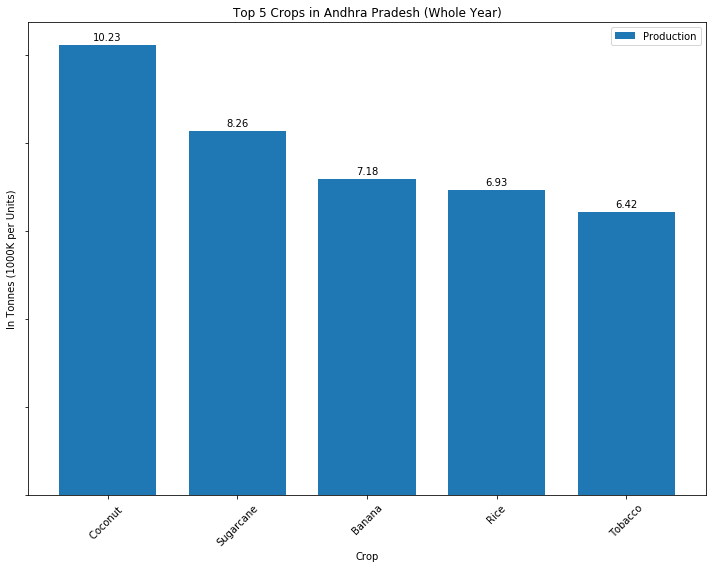

In [9]:
# Top 5 Crops (Whole Year)
top_crop = data_wy.groupby(['Crop' ]).sum().sort_values('Production', ascending=False)
top_crop.reset_index(inplace=True)
top5_crop=top_crop.head(5)
top5_crop['Production'] = np.log10(top5_crop['Production'])

crop_labels = top5_crop['Crop'].tolist()
crop_means = top5_crop['Production'].tolist()


x = np.arange(len(crop_labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(x - width+1.5/2, crop_means, width, label='Production')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('In Tonnes (1000K per Units)')
ax.set_xlabel('Crop')
ax.set_title('Top 5 Crops in Andhra Pradesh (Whole Year)')
ax.set_xticks(x)
ax.set_xticklabels(crop_labels, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_crop_wy.png')
plt.show()

D:\Programs\Python\Python36\Lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


7.902952711956447
7.653525266879959
7.251259257913106
7.143241636438059
6.82316639702678


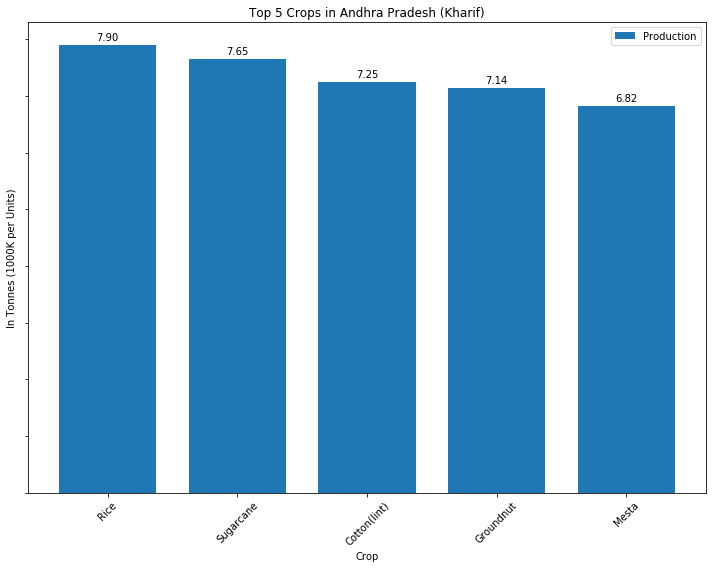

In [10]:
# Top 5 Crops (Season = Karif)
top_crop = data_kharif.groupby(['Crop' ]).sum().sort_values('Production', ascending=False)
top_crop.reset_index(inplace=True)
top5_crop=top_crop.head(5)
top5_crop['Production'] = np.log10(top5_crop['Production'])

crop_labels = top5_crop['Crop'].tolist()
crop_means = top5_crop['Production'].tolist()


x = np.arange(len(crop_labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(x - width+1.5/2, crop_means, width, label='Production')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('In Tonnes (1000K per Units)')
ax.set_xlabel('Crop')
ax.set_title('Top 5 Crops in Andhra Pradesh (Kharif)')
ax.set_xticks(x)
ax.set_xticklabels(crop_labels, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_crop-kharif.png')
plt.show()

D:\Programs\Python\Python36\Lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


7.742820571361933
7.188462766031084
6.875202762433211
6.651093690555751
6.647583344917598


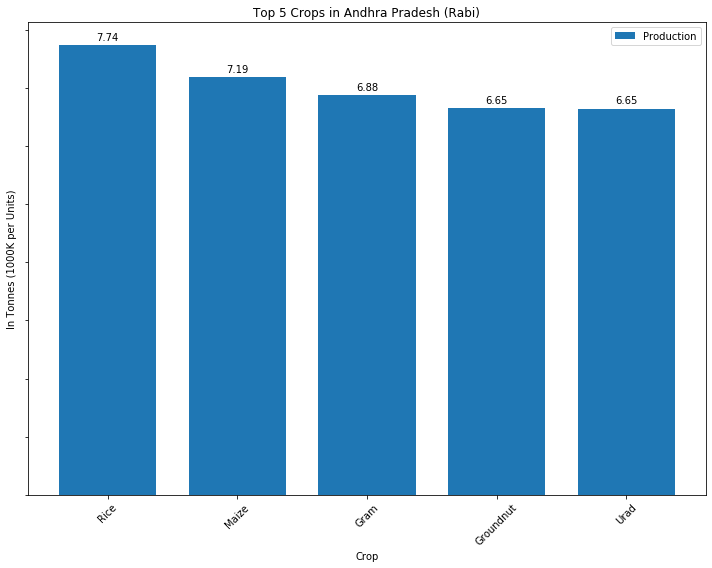

In [11]:
# Top 5 Crops (Season = Rabi)
top_crop = data_rabi.groupby(['Crop' ]).sum().sort_values('Production', ascending=False)
top_crop.reset_index(inplace=True)
top5_crop=top_crop.head(5)
top5_crop['Production'] = np.log10(top5_crop['Production'])

crop_labels = top5_crop['Crop'].tolist()
crop_means = top5_crop['Production'].tolist()


x = np.arange(len(crop_labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(x - width+1.5/2, crop_means, width, label='Production')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('In Tonnes (1000K per Units)')
ax.set_xlabel('Crop')
ax.set_title('Top 5 Crops in Andhra Pradesh (Rabi)')
ax.set_xticks(x)
ax.set_xticklabels(crop_labels, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_crop-rabi.png')
plt.show()

1.0
0.5112126085330511
0.2577683813492836
0.11718887625440891
0.05345706860628489


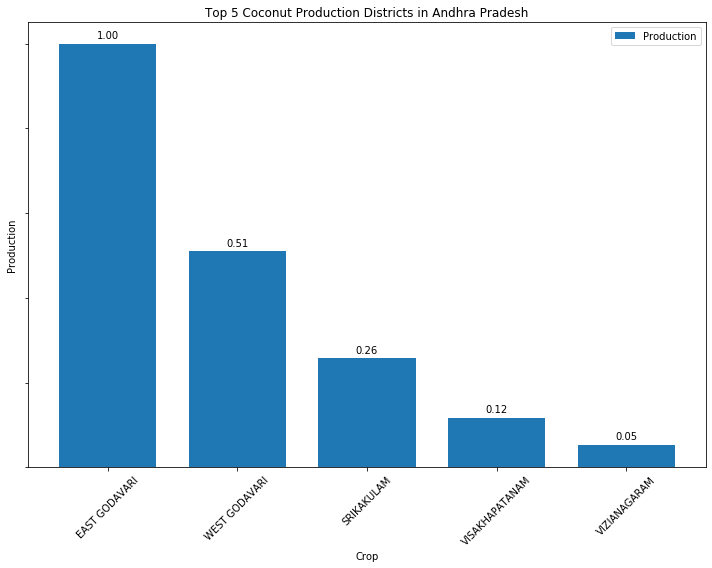

In [12]:
# Top 5 districts for Coconut
#only_coconut = data_wy['Crop']=='Coconut '
#only_coconut.head()
data_wy_coconut= data_wy[data_wy['Crop']=='Coconut ']
data_wy_coconut.set_index('District_Name', inplace=True)
data_wy_coconut = normalize(data_wy_coconut[['Production']])
data_wy_coconut = data_wy_coconut.sort_values('Production', ascending=False)
data_wy_coconut_top5 = data_wy_coconut.head(5)
#data_wy_coconut_top5['Production'] = np.log10(data_wy_coconut_top5['Production'])

crop_labels1 = data_wy_coconut_top5.index
crop_means1 = data_wy_coconut_top5['Production'].tolist()

x1 = np.arange(len(crop_labels1))  # the label locations
fig, ax= plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width+1.5/2, crop_means1, width, label='Production')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Production')
ax.set_xlabel('Crop')
ax.set_title('Top 5 Coconut Production Districts in Andhra Pradesh')
ax.set_xticks(x)
ax.set_xticklabels(crop_labels1, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects1)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_coconut_production.png')
plt.show()

1.0
0.9707781534627411
0.7561409654061002
0.534421262920265
0.45554316011556


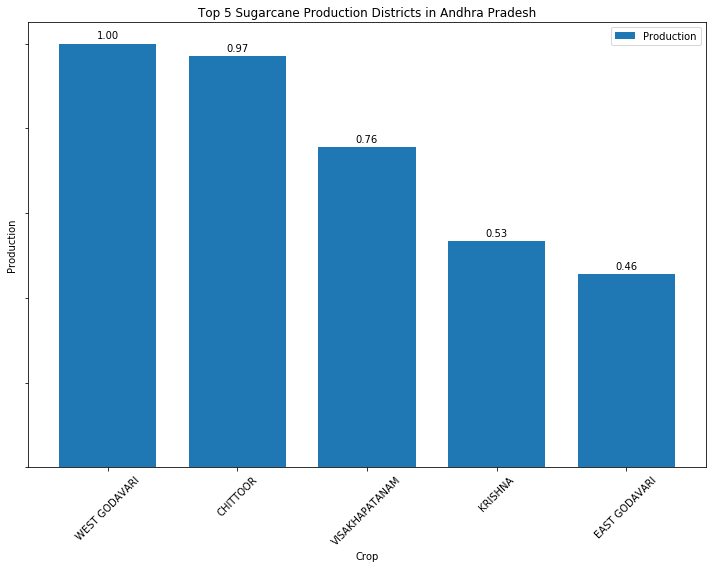

In [13]:
# Top 5 districts for Sugarcane

data_wy_sugarcane= data_wy[data_wy['Crop']=='Sugarcane']
data_wy_sugarcane.set_index('District_Name', inplace=True)
data_wy_sugarcane = normalize(data_wy_sugarcane[['Production']])
data_wy_sugarcane = data_wy_sugarcane.sort_values('Production', ascending=False)
data_wy_sugarcane_top5 = data_wy_sugarcane.head(5)
#data_wy_sugarcane_top5['Production'] = np.log10(data_wy_sugarcane_top5['Production'])

crop_labels2 = data_wy_sugarcane_top5.index
crop_means2 = data_wy_sugarcane_top5['Production'].tolist()

x2 = np.arange(len(crop_labels2))  # the label locations
fig, ax= plt.subplots(figsize=(10,8))
rects2 = ax.bar(x2 - width+1.5/2, crop_means2, width, label='Production')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Production')
ax.set_xlabel('Crop')
ax.set_title('Top 5 Sugarcane Production Districts in Andhra Pradesh')
ax.set_xticks(x2)
ax.set_xticklabels(crop_labels2, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects2)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_sgarcane_production.png')
plt.show()


1.0
0.960374032294888
0.6676646395882194
0.594284443037712
0.5749692565534131


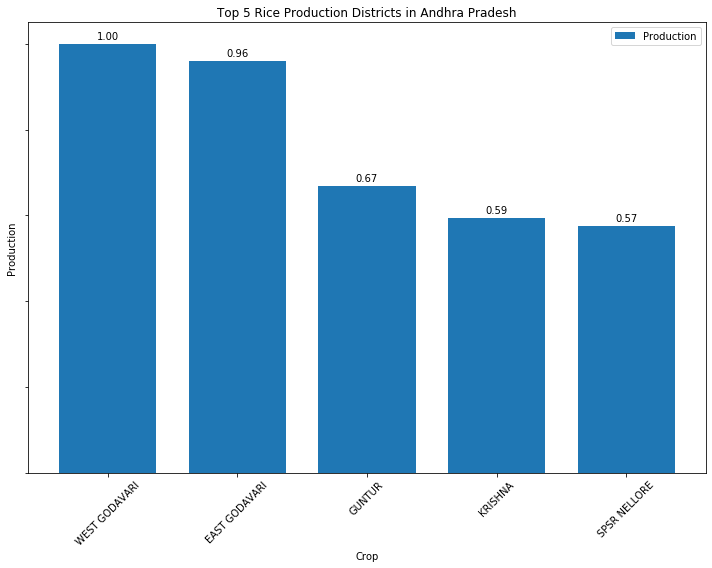

In [14]:
# Top 5 districts for Rice

data_wy_rice= data_wy[data_wy['Crop']=='Rice']
data_wy_rice.set_index('District_Name', inplace=True)
data_wy_rice = normalize(data_wy_rice[['Production']])
data_wy_rice = data_wy_rice.sort_values('Production', ascending=False)
data_wy_rice_top5 = data_wy_rice.head()
#data_wy_rice_top5['Production'] = np.log10(data_wy_rice_top5['Production'])

crop_labels3 = data_wy_rice_top5.index
crop_means3 = data_wy_rice_top5['Production'].tolist()

x3 = np.arange(len(crop_labels3))  # the label locations
fig, ax= plt.subplots(figsize=(10,8))
rects3= ax.bar(x3 - width+1.5/2, crop_means3, width, label='Production')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Production')
ax.set_xlabel('Crop')            
ax.set_title('Top 5 Rice Production Districts in Andhra Pradesh')
ax.set_xticks(x3)
ax.set_xticklabels(crop_labels3, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects3)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_rice_production.png')
plt.show()

1.0
0.7106974348384462
0.5373573186167084
0.5179959233061825
0.4692980522591775


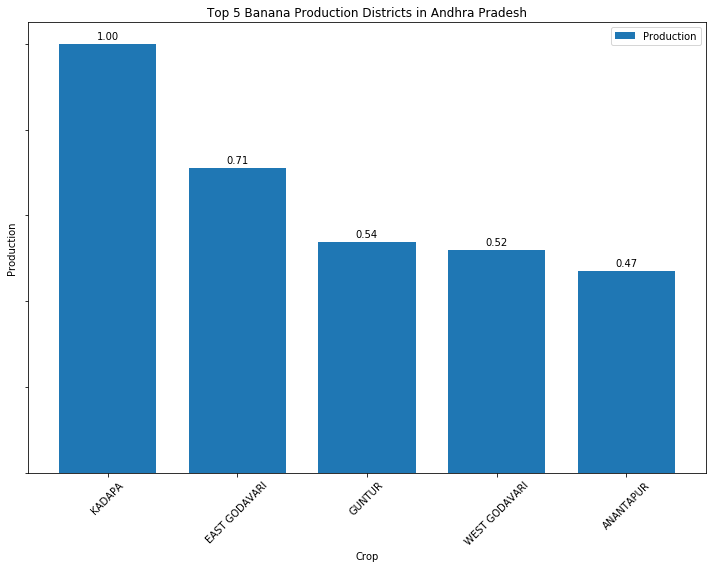

In [15]:
# Top 5 districts for Banana
data_wy_banana= data_wy[data_wy['Crop']=='Banana']
data_wy_banana.set_index('District_Name', inplace=True)
data_wy_banana = normalize(data_wy_banana[['Production']])
data_wy_banana = data_wy_banana.sort_values('Production', ascending=False)
data_wy_banana_top5 = data_wy_banana.head()
#data_wy_maize_top5['Production'] = np.log10(data_wy_maize_top5['Production'])

crop_labels4 = data_wy_banana_top5.index
crop_means4 = data_wy_banana_top5['Production'].tolist()

x4 = np.arange(len(crop_labels4))  # the label locations
fig, ax =plt.subplots(figsize=(10,8))
rects4= ax.bar(x4 - width+1.5/2, crop_means4, width, label='Production')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Production')
ax.set_xlabel('Crop')
ax.set_title('Top 5 Banana Production Districts in Andhra Pradesh')
ax.set_xticks(x4)
ax.set_xticklabels(crop_labels4, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects4)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_banana_production.png')
plt.show()

1.0
0.47166578565227757
0.1810295466719205
0.174593010931908
0.14641579598697213


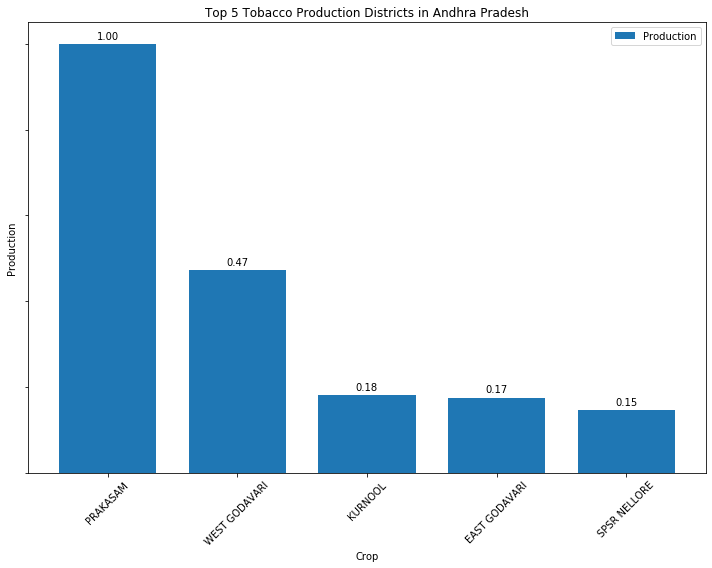

In [16]:
# Top 5 districts for Tobacco

data_wy_tobacco= data_wy[data_wy['Crop']=='Tobacco']
data_wy_tobacco.set_index('District_Name', inplace=True)
data_wy_tobacco = normalize(data_wy_tobacco[['Production']])
data_wy_tobacco = data_wy_tobacco.sort_values('Production', ascending=False)
data_wy_tobacco_top5 = data_wy_tobacco.head()
#data_wy_tobacco_top5['Production'] = np.log10(data_wy_tobacco_top5['Production'])

crop_labels5 = data_wy_tobacco_top5.index
crop_means5 = data_wy_tobacco_top5['Production'].tolist()

x5 = np.arange(len(crop_labels4))  # the label locations
fig, ax =plt.subplots(figsize=(10,8))
rects5= ax.bar(x5 - width+1.5/2, crop_means5, width, label='Production')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Production')
ax.set_xlabel('Crop')
ax.set_title('Top 5 Tobacco Production Districts in Andhra Pradesh')
ax.set_xticks(x4)
ax.set_xticklabels(crop_labels5, rotation=45)
ax.set_yticklabels('')
ax.legend()

autolabel(rects5)
fig.tight_layout()
fig.savefig('D:\\GitHub\\Projects\\Coursera_Capstone\\ap_top5_tobacco_production.png')
plt.show()

In [17]:
#Geo Locations for each districts
geolocator = Nominatim(user_agent="my-application1")
location = geolocator.geocode(state_name)
latitude = location.latitude
longitude = location.longitude

print("State :{}, Latitude: {}, Longitude: {}".format(state_name, latitude, longitude))


State :Andhra Pradesh, Latitude: 15.9240905, Longitude: 80.1863809


In [18]:
# one hot encoding
data_onehot = pd.get_dummies(data['Crop'], prefix="", prefix_sep="")
data_onehot.head()
data_onehot.columns


Index(['Arecanut', 'Arhar/Tur', 'Bajra', 'Banana', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Bottle Gourd', 'Brinjal', 'Cabbage', 'Cashewnut',
       'Castor seed', 'Citrus Fruit', 'Coconut ', 'Coriander', 'Cotton(lint)',
       'Cowpea(Lobia)', 'Cucumber', 'Dry chillies', 'Dry ginger', 'Garlic',
       'Ginger', 'Gram', 'Grapes', 'Groundnut', 'Horse-gram', 'Jowar', 'Korra',
       'Lemon', 'Linseed', 'Maize', 'Mango', 'Masoor', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Orange',
       'Other  Rabi pulses', 'Other Fresh Fruits', 'Other Kharif pulses',
       'Other Vegetables', 'Papaya', 'Peas  (vegetable)', 'Pome Fruit',
       'Pome Granet', 'Potato', 'Ragi', 'Rapeseed &Mustard', 'Rice',
       'Safflower', 'Samai', 'Sannhamp', 'Sapota', 'Sesamum', 'Small millets',
       'Soyabean', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca',
       'Tobacco', 'Tomato', 'Turmeric', 'Urad', 'Varagu', 'Wheat',
       'other fibres', 'other misc. pulses', 'other oilseed

In [19]:
# Correct the District name for VISHAKAPATNAM for Andhra Pradesh state
data_onehot['District_Name'] = data['District_Name'].replace('VISAKHAPATANAM',"VISAKHAPATNAM")
#data_onehot['District_Name'].replace({'RANGAREDDI':'RANGAREDDY'}, inplace=True)
data_onehot.shape


(9628, 70)

In [20]:
#Next, let's group rows by District and by taking the mean of the frequency of occurrence of each category

data_onehot_grouped= data_onehot.groupby('District_Name').mean().reset_index()

data_onehot_grouped.head()

,District_Name,Arecanut,Arhar/Tur,Bajra,Banana,Beans & Mutter(Vegetable),Bhindi,Bottle Gourd,Brinjal,Cabbage,Cashewnut,Castor seed,Citrus Fruit,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Korra,Lemon,Linseed,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Niger seed,Onion,Orange,Other Rabi pulses,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Papaya,Peas (vegetable),Pome Fruit,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Varagu,Wheat,other fibres,other misc. pulses,other oilseeds
0,ANANTAPUR,0.015228,0.026650,0.041878,0.015228,0.001269,0.002538,0.000000,0.010152,0.005076,0.003807,0.027919,0.002538,0.016497,0.021574,0.026650,0.010152,0.002538,0.039340,0.000000,0.000000,0.0,0.025381,0.006345,0.045685,0.044416,0.045685,0.010152,0.003807,0.015228,0.045685,0.006345,0.002538,0.003807,0.039340,0.000000,0.038071,0.002538,0.003807,0.002538,0.020305,0.002538,0.006345,0.000000,0.002538,0.003807,0.011421,0.044416,0.001269,0.046954,0.020305,0.002538,0.000000,0.003807,0.005076,0.027919,0.013959,0.021574,0.030457,0.017766,0.000000,0.022843,0.010152,0.013959,0.031726,0.000000,0.021574,0.001269,0.001269,0.003807
1,CHITTOOR,0.000000,0.031686,0.041825,0.015209,0.002535,0.002535,0.000000,0.010139,0.010139,0.019011,0.021546,0.002535,0.016477,0.021546,0.017744,0.010139,0.002535,0.038023,0.000000,0.000000,0.0,0.015209,0.006337,0.045627,0.045627,0.032953,0.005070,0.003802,0.012674,0.044360,0.006337,0.001267,0.010139,0.041825,0.000000,0.036755,0.002535,0.011407,0.002535,0.022814,0.002535,0.006337,0.001267,0.002535,0.003802,0.020279,0.045627,0.002535,0.046895,0.000000,0.006337,0.000000,0.003802,0.041825,0.019011,0.002535,0.022814,0.031686,0.021546,0.006337,0.020279,0.010139,0.017744,0.039290,0.000000,0.007605,0.000000,0.002535,0.003802
2,EAST GODAVARI,0.014379,0.028758,0.028758,0.015686,0.002614,0.002614,0.002614,0.010458,0.010458,0.019608,0.016993,0.002614,0.016993,0.010458,0.023529,0.007843,0.002614,0.045752,0.003922,0.000000,0.0,0.020915,0.000000,0.044444,0.037908,0.040523,0.006536,0.003922,0.001307,0.047059,0.006536,0.001307,0.015686,0.044444,0.015686,0.039216,0.002614,0.007843,0.002614,0.003922,0.002614,0.006536,0.000000,0.002614,0.001307,0.000000,0.040523,0.001307,0.048366,0.001307,0.007843,0.001307,0.003922,0.047059,0.022222,0.007843,0.023529,0.023529,0.020915,0.016993,0.027451,0.010458,0.018301,0.045752,0.000000,0.000000,0.000000,0.001307,0.007843
3,GUNTUR,0.000000,0.046579,0.036390,0.017467,0.002911,0.002911,0.002911,0.011645,0.011645,0.021834,0.032023,0.002911,0.018923,0.011645,0.027656,0.004367,0.002911,0.050946,0.000000,0.000000,0.0,0.027656,0.000000,0.050946,0.004367,0.046579,0.000000,0.004367,0.001456,0.052402,0.007278,0.002911,0.004367,0.052402,0.000000,0.042213,0.002911,0.000000,0.002911,0.000000,0.002911,0.007278,0.000000,0.002911,0.000000,0.000000,0.016012,0.021834,0.053857,0.001456,0.000000,0.001456,0.004367,0.050946,0.011645,0.017467,0.026201,0.021834,0.018923,0.001456,0.027656,0.011645,0.020378,0.052402,0.007278,0.001456,0.001456,0.000000,0.008734
4,KADAPA,0.000000,0.035194,0.042476,0.014563,0.002427,0.002427,0.001214,0.009709,0.001214,0.018204,0.026699,0.002427,0.015777,0.018204,0.025485,0.009709,0.002427,0.041262,0.002427,0.001214,0.0,0.025485,0.003641,0.043689,0.042476,0.043689,0.008495,0.003641,0.008495,0.037621,0.006068,0.002427,0.001214,0.036408,0.000000,0.036408,0.002427,0.009709,0.002427,0.015777,0.002427,0.008495,0.000000,0.002427,0.003641,0.003641,0.041262,0.003641,0.044903,0.008495,0.004854,0.000000,0.003641,0.040049,0.031553,0.010922,0.021845,0.030340,0.019417,0.000000,0.023058,0.009709,0.019417,0.037621,0.000000,0.020631,0.000000,0.001214,0.003641


In [21]:
# Get all districts fod a given state
districts = data_onehot_grouped.District_Name.unique()
districts


array(['ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATNAM', 'VIZIANAGARAM', 'WEST GODAVARI'], dtype=object)

In [22]:
# Get the langitude and latitude for each district
district_names =[]
district_lats=[]
district_lngs= []
#geolocator = Nominatim(user_agent="my-application1")
for district in districts:
    #print('' + district)    
    location = geolocator.geocode(district)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(district, latitude, longitude))
    district_lats.append(latitude)
    district_lngs.append(longitude)
    district_names.append(district)

district_lats
district_lngs
district_names

for dist, lat, lon in zip(district_names, district_lats, district_lngs):
    print ('{} - {}, {}'.format(dist, lat, lon))

ANANTAPUR - 14.55, 77.416667
CHITTOOR - 13.30374115, 78.9877010160408
EAST GODAVARI - 17.233496, 81.7225986
GUNTUR - 16.2915189, 80.4541588
KADAPA - 14.4671491, 78.8228877
KRISHNA - 16.6691525, 80.7190024
KURNOOL - 15.8309251, 78.0425373
PRAKASAM - 15.5, 79.5
SPSR NELLORE - 14.4493717, 79.9873763
SRIKAKULAM - 18.32002205, 83.9160771993717
VISAKHAPATNAM - 17.7231276, 83.3012842
VIZIANAGARAM - 18.1120819, 83.4052196224888
WEST GODAVARI - 17.0, 81.166667


In [23]:
dist_lat_lng = pd.DataFrame([district_names,district_lats,district_lngs]).T.reset_index(drop=True)
dist_lat_lng.columns = ['District_Name','latitude','longitude']
dist_lat_lng.head()

dist_data_onehot_grouped = data_onehot_grouped.join(dist_lat_lng.set_index('District_Name'), on='District_Name' )
dist_data_onehot_grouped.fillna(0, inplace=True)

In [24]:
dist_data_onehot_grouped.shape

(13, 72)

In [25]:
#dist_data_onehot_grouped.columns
dist_crop_columns = ['District_Name','Arecanut', 'Arhar/Tur', 'Bajra', 'Banana',
       'Beans & Mutter(Vegetable)', 'Bhindi', 'Bottle Gourd', 'Brinjal',
       'Cabbage', 'Cashewnut', 'Castor seed', 'Citrus Fruit', 'Coconut ',
       'Coriander', 'Cotton(lint)', 'Cowpea(Lobia)', 'Cucumber',
       'Dry chillies', 'Dry ginger', 'Garlic', 'Ginger', 'Gram', 'Grapes',
       'Groundnut', 'Horse-gram', 'Jowar', 'Korra', 'Lemon', 'Linseed',
       'Maize', 'Mango', 'Masoor', 'Mesta', 'Moong(Green Gram)', 'Niger seed',
       'Onion', 'Orange', 'Other  Rabi pulses', 'Other Fresh Fruits',
       'Other Kharif pulses', 'Other Vegetables', 'Papaya',
       'Peas  (vegetable)', 'Pome Fruit', 'Pome Granet', 'Potato', 'Ragi',
       'Rapeseed &Mustard', 'Rice', 'Safflower', 'Samai', 'Sannhamp', 'Sapota',
       'Sesamum', 'Small millets', 'Soyabean', 'Sugarcane', 'Sunflower',
       'Sweet potato', 'Tapioca', 'Tobacco', 'Tomato', 'Turmeric', 'Urad',
       'Varagu', 'Wheat', 'other fibres', 'other misc. pulses',
       'other oilseeds']


In [26]:
num_top_crops = 5
dist_crop_data = dist_data_onehot_grouped.loc[:,dist_crop_columns]

for district in dist_crop_data['District_Name']:
    print("----"+district+"----")
    temp = dist_crop_data[dist_crop_data['District_Name'] == district].T.reset_index()
    temp.columns = ['crop','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_crops))
    print('\n')


----ANANTAPUR----
           crop  freq
0     Groundnut  0.05
1         Maize  0.05
2         Jowar  0.05
3          Rice  0.05
4  Dry chillies  0.04


----CHITTOOR----
         crop  freq
0  Horse-gram  0.05
1   Groundnut  0.05
2        Ragi  0.05
3        Rice  0.05
4     Sesamum  0.04


----EAST GODAVARI----
           crop  freq
0       Sesamum  0.05
1          Rice  0.05
2          Urad  0.05
3         Maize  0.05
4  Dry chillies  0.05


----GUNTUR----
                crop  freq
0            Sesamum  0.05
1              Maize  0.05
2               Urad  0.05
3  Moong(Green Gram)  0.05
4              Jowar  0.05


----KADAPA----
        crop  freq
0  Groundnut  0.04
1       Urad  0.04
2       Rice  0.04
3    Sesamum  0.04
4      Onion  0.04


----KRISHNA----
                crop  freq
0               Rice  0.06
1          Groundnut  0.06
2       Dry chillies  0.06
3              Maize  0.06
4  Moong(Green Gram)  0.06


----KURNOOL----
            crop  freq
0           Rice  0.04
1

In [27]:
#Let's put that into a pandas dataframe
def return_most_common_crops(row, num_top_crops):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_crops]


In [28]:

num_top_crops = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top Crops
columns = ['District_Name']
for ind in np.arange(num_top_crops):
    try:
        columns.append('{}{} Most Common Crop'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Crop'.format(ind+1))

# create a new dataframe
districts_crops_sorted = pd.DataFrame(columns=columns)
districts_crops_sorted['District_Name'] = dist_crop_data['District_Name']

for ind in np.arange(dist_crop_data.shape[0]):
    districts_crops_sorted.iloc[ind, 1:] = return_most_common_crops(dist_crop_data.iloc[ind, :], num_top_crops)

districts_crops_sorted.head()


,District_Name,1st Most Common Crop,2nd Most Common Crop,3rd Most Common Crop,4th Most Common Crop,5th Most Common Crop,6th Most Common Crop,7th Most Common Crop,8th Most Common Crop,9th Most Common Crop,10th Most Common Crop
0,ANANTAPUR,Rice,Maize,Groundnut,Jowar,Ragi,Horse-gram,Bajra,Dry chillies,Moong(Green Gram),Onion
1,CHITTOOR,Rice,Horse-gram,Groundnut,Ragi,Maize,Bajra,Moong(Green Gram),Sesamum,Urad,Dry chillies
2,EAST GODAVARI,Rice,Sesamum,Maize,Dry chillies,Urad,Groundnut,Moong(Green Gram),Ragi,Jowar,Onion
3,GUNTUR,Rice,Moong(Green Gram),Urad,Maize,Sesamum,Dry chillies,Groundnut,Jowar,Arhar/Tur,Onion
4,KADAPA,Rice,Jowar,Groundnut,Horse-gram,Bajra,Ragi,Dry chillies,Sesamum,Urad,Maize


# Cluster Districts
### Run k-means to cluster the neighborhood into 4 clusters


In [29]:

# set number of clusters
kclusters = 4

dist_crop_data_clustering = dist_crop_data.drop('District_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dist_crop_data_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 1, 3, 0, 2, 0, 0, 3, 1])

In [30]:
# add clustering labels
districts_crops_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

district_merged = dist_data_onehot_grouped

# merge district_merged with toronto_data to add latitude/longitude for each neighborhood
district_merged = district_merged.join(districts_crops_sorted.set_index('District_Name'), on='District_Name')
district_merged['Cluster Labels'] =  district_merged['Cluster Labels'].fillna(0.0).astype(int)

district_merged.head() # check the last columns!
district_merged.columns

Index(['District_Name', 'Arecanut', 'Arhar/Tur', 'Bajra', 'Banana',
       'Beans & Mutter(Vegetable)', 'Bhindi', 'Bottle Gourd', 'Brinjal',
       'Cabbage', 'Cashewnut', 'Castor seed', 'Citrus Fruit', 'Coconut ',
       'Coriander', 'Cotton(lint)', 'Cowpea(Lobia)', 'Cucumber',
       'Dry chillies', 'Dry ginger', 'Garlic', 'Ginger', 'Gram', 'Grapes',
       'Groundnut', 'Horse-gram', 'Jowar', 'Korra', 'Lemon', 'Linseed',
       'Maize', 'Mango', 'Masoor', 'Mesta', 'Moong(Green Gram)', 'Niger seed',
       'Onion', 'Orange', 'Other  Rabi pulses', 'Other Fresh Fruits',
       'Other Kharif pulses', 'Other Vegetables', 'Papaya',
       'Peas  (vegetable)', 'Pome Fruit', 'Pome Granet', 'Potato', 'Ragi',
       'Rapeseed &Mustard', 'Rice', 'Safflower', 'Samai', 'Sannhamp', 'Sapota',
       'Sesamum', 'Small millets', 'Soyabean', 'Sugarcane', 'Sunflower',
       'Sweet potato', 'Tapioca', 'Tobacco', 'Tomato', 'Turmeric', 'Urad',
       'Varagu', 'Wheat', 'other fibres', 'other misc. pulses

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(district_merged['latitude'], district_merged['longitude'], district_merged['District_Name'], district_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
#map_path = "d:\\Temp\\"+state_name+"-map.html"
map_path = "d:\\Temp\\"+state_name+"-map.html"
print(map_path)
map_clusters.save(map_path, close_file=True)

d:\Temp\Andhra Pradesh-map.html


In [32]:

#Cluster 1

district_merged.loc[district_merged['Cluster Labels'] == 0, district_merged.columns[[1] + list(range(5, district_merged.shape[1]))]]



,Arecanut,Beans & Mutter(Vegetable),Bhindi,Bottle Gourd,Brinjal,Cabbage,Cashewnut,Castor seed,Citrus Fruit,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Korra,Lemon,Linseed,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Niger seed,Onion,Orange,Other Rabi pulses,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Papaya,Peas (vegetable),Pome Fruit,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Varagu,Wheat,other fibres,other misc. pulses,other oilseeds,latitude,longitude,Cluster Labels,1st Most Common Crop,2nd Most Common Crop,3rd Most Common Crop,4th Most Common Crop,5th Most Common Crop,6th Most Common Crop,7th Most Common Crop,8th Most Common Crop,9th Most Common Crop,10th Most Common Crop
0,0.015228,0.001269,0.002538,0.000000,0.010152,0.005076,0.003807,0.027919,0.002538,0.016497,0.021574,0.026650,0.010152,0.002538,0.039340,0.000000,0.000000,0.0,0.025381,0.006345,0.045685,0.044416,0.045685,0.010152,0.003807,0.015228,0.045685,0.006345,0.002538,0.003807,0.039340,0.000000,0.038071,0.002538,0.003807,0.002538,0.020305,0.002538,0.006345,0.000000,0.002538,0.003807,0.011421,0.044416,0.001269,0.046954,0.020305,0.002538,0.000000,0.003807,0.005076,0.027919,0.013959,0.021574,0.030457,0.017766,0.000000,0.022843,0.010152,0.013959,0.031726,0.000000,0.021574,0.001269,0.001269,0.003807,14.550000,77.416667,0,Rice,Maize,Groundnut,Jowar,Ragi,Horse-gram,Bajra,Dry chillies,Moong(Green Gram),Onion
1,0.000000,0.002535,0.002535,0.000000,0.010139,0.010139,0.019011,0.021546,0.002535,0.016477,0.021546,0.017744,0.010139,0.002535,0.038023,0.000000,0.000000,0.0,0.015209,0.006337,0.045627,0.045627,0.032953,0.005070,0.003802,0.012674,0.044360,0.006337,0.001267,0.010139,0.041825,0.000000,0.036755,0.002535,0.011407,0.002535,0.022814,0.002535,0.006337,0.001267,0.002535,0.003802,0.020279,0.045627,0.002535,0.046895,0.000000,0.006337,0.000000,0.003802,0.041825,0.019011,0.002535,0.022814,0.031686,0.021546,0.006337,0.020279,0.010139,0.017744,0.039290,0.000000,0.007605,0.000000,0.002535,0.003802,13.303741,78.987701,0,Rice,Horse-gram,Groundnut,Ragi,Maize,Bajra,Moong(Green Gram),Sesamum,Urad,Dry chillies
4,0.000000,0.002427,0.002427,0.001214,0.009709,0.001214,0.018204,0.026699,0.002427,0.015777,0.018204,0.025485,0.009709,0.002427,0.041262,0.002427,0.001214,0.0,0.025485,0.003641,0.043689,0.042476,0.043689,0.008495,0.003641,0.008495,0.037621,0.006068,0.002427,0.001214,0.036408,0.000000,0.036408,0.002427,0.009709,0.002427,0.015777,0.002427,0.008495,0.000000,0.002427,0.003641,0.003641,0.041262,0.003641,0.044903,0.008495,0.004854,0.000000,0.003641,0.040049,0.031553,0.010922,0.021845,0.030340,0.019417,0.000000,0.023058,0.009709,0.019417,0.037621,0.000000,0.020631,0.000000,0.001214,0.003641,14.467149,78.822888,0,Rice,Jowar,Groundnut,Horse-gram,Bajra,Ragi,Dry chillies,Sesamum,Urad,Maize
6,0.000000,0.002415,0.002415,0.002415,0.009662,0.009662,0.000000,0.025362,0.002415,0.015700,0.020531,0.025362,0.006039,0.002415,0.042271,0.002415,0.000000,0.0,0.022947,0.004831,0.043478,0.031401,0.043478,0.010870,0.003623,0.007246,0.043478,0.006039,0.002415,0.009662,0.042271,0.001208,0.037440,0.002415,0.007246,0.002415,0.008454,0.002415,0.007246,0.000000,0.002415,0.003623,0.010870,0.014493,0.018116,0.044686,0.020531,0.002415,0.001208,0.003623,0.038647,0.035024,0.013285,0.021739,0.028986,0.013285,0.000000,0.025362,0.009662,0.018116,0.043478,0.000000,0.021739,0.000000,0.002415,0.002415,15.830925,78.042537,0,Rice,Groundnut,Urad,Maize,Jowar,Dry chillies,Moong(Green Gram),Bajra,Arhar/Tur,Sesamum
7,0.000000,0.002475,0.002475,0.002475,0.009901,0.007426,0.018564,0.027228,0.002475,0.016089,0.018564,0.025990,0.009901,0.002475,0.043317,0.001238,0.000000,0.0,0.023515,0.000000,0.044554,0.025990,0.044554,0.008663,0.003713,0.000000,0.044554,0.006188,0.002475,0.003713,0.044554,0.003713,0.035891,

In [33]:
#Cluster 2

district_merged.loc[district_merged['Cluster Labels'] == 1, district_merged.columns[[1] + list(range(5, district_merged.shape[1]))]]



,Arecanut,Beans & Mutter(Vegetable),Bhindi,Bottle Gourd,Brinjal,Cabbage,Cashewnut,Castor seed,Citrus Fruit,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Korra,Lemon,Linseed,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Niger seed,Onion,Orange,Other Rabi pulses,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Papaya,Peas (vegetable),Pome Fruit,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Varagu,Wheat,other fibres,other misc. pulses,other oilseeds,latitude,longitude,Cluster Labels,1st Most Common Crop,2nd Most Common Crop,3rd Most Common Crop,4th Most Common Crop,5th Most Common Crop,6th Most Common Crop,7th Most Common Crop,8th Most Common Crop,9th Most Common Crop,10th Most Common Crop
2,0.014379,0.002614,0.002614,0.002614,0.010458,0.010458,0.019608,0.016993,0.002614,0.016993,0.010458,0.023529,0.007843,0.002614,0.045752,0.003922,0.000000,0.000000,0.020915,0.0,0.044444,0.037908,0.040523,0.006536,0.003922,0.001307,0.047059,0.006536,0.001307,0.015686,0.044444,0.015686,0.039216,0.002614,0.007843,0.002614,0.003922,0.002614,0.006536,0.0,0.002614,0.001307,0.000000,0.040523,0.001307,0.048366,0.001307,0.007843,0.001307,0.003922,0.047059,0.022222,0.007843,0.023529,0.023529,0.020915,0.016993,0.027451,0.010458,0.018301,0.045752,0.000000,0.000000,0.0,0.001307,0.007843,17.233496,81.722599,1,Rice,Sesamum,Maize,Dry chillies,Urad,Groundnut,Moong(Green Gram),Ragi,Jowar,Onion
9,0.000000,0.002903,0.002903,0.002903,0.011611,0.011611,0.021771,0.000000,0.000000,0.018868,0.001451,0.026125,0.000000,0.000000,0.046444,0.021771,0.001451,0.001451,0.008708,0.0,0.052250,0.033382,0.043541,0.007257,0.004354,0.000000,0.050798,0.007257,0.001451,0.024673,0.052250,0.000000,0.043541,0.000000,0.001451,0.002903,0.013062,0.002903,0.004354,0.0,0.002903,0.000000,0.004354,0.052250,0.000000,0.053701,0.001451,0.007257,0.000000,0.004354,0.052250,0.018868,0.000000,0.026125,0.026125,0.021771,0.018868,0.018868,0.011611,0.020319,0.050798,0.000000,0.001451,0.0,0.001451,0.007257,18.320022,83.916077,1,Rice,Sesamum,Moong(Green Gram),Ragi,Groundnut,Maize,Urad,Dry chillies,Jowar,Onion
10,0.000000,0.002463,0.002463,0.002463,0.009852,0.009852,0.018473,0.014778,0.002463,0.016010,0.001232,0.020936,0.009852,0.002463,0.043103,0.018473,0.000000,0.001232,0.020936,0.0,0.044335,0.041872,0.043103,0.006158,0.003695,0.000000,0.044335,0.006158,0.001232,0.016010,0.044335,0.019704,0.035714,0.002463,0.017241,0.002463,0.022167,0.002463,0.003695,0.0,0.002463,0.000000,0.018473,0.044335,0.001232,0.045567,0.001232,0.006158,0.000000,0.003695,0.044335,0.019704,0.000000,0.022167,0.018473,0.020936,0.016010,0.025862,0.009852,0.018473,0.044335,0.001232,0.000000,0.0,0.002463,0.007389,17.723128,83.301284,1,Rice,Moong(Green Gram),Ragi,Maize,Urad,Sesamum,Groundnut,Dry chillies,Jowar,Horse-gram
11,0.010796,0.002699,0.002699,0.002699,0.010796,0.010796,0.020243,0.018893,0.002699,0.017544,0.000000,0.024291,0.000000,0.002699,0.045884,0.013495,0.000000,0.001350,0.022942,0.0,0.048583,0.024291,0.041835,0.008097,0.004049,0.001350,0.048583,0.006748,0.001350,0.022942,0.048583,0.020243,0.039136,0.002699,0.002699,0.002699,0.001350,0.002699,0.008097,0.0,0.002699,0.004049,0.002699,0.048583,0.002699,0.049933,0.000000,0.006748,0.001350,0.004049,0.048583,0.022942,0.000000,0.024291,0.014845,0.021592,0.016194,0.026991,0.010796,0.018893,0.048583,0.000000,0.000000,0.0,0.000000,0.008097,18.112082,83.405220,1,Rice,Sesamum,Maize,Groundnut,Ragi,Moong(Green Gram),Urad,Dry chillies,Jowar,Onion


In [34]:
#Cluster 3

district_merged.loc[district_merged['Cluster Labels'] == 2, district_merged.columns[[1] + list(range(5, district_merged.shape[1]))]]



,Arecanut,Beans & Mutter(Vegetable),Bhindi,Bottle Gourd,Brinjal,Cabbage,Cashewnut,Castor seed,Citrus Fruit,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Korra,Lemon,Linseed,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Niger seed,Onion,Orange,Other Rabi pulses,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Papaya,Peas (vegetable),Pome Fruit,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Varagu,Wheat,other fibres,other misc. pulses,other oilseeds,latitude,longitude,Cluster Labels,1st Most Common Crop,2nd Most Common Crop,3rd Most Common Crop,4th Most Common Crop,5th Most Common Crop,6th Most Common Crop,7th Most Common Crop,8th Most Common Crop,9th Most Common Crop,10th Most Common Crop
5,0.007862,0.003145,0.003145,0.003145,0.012579,0.012579,0.023585,0.011006,0.003145,0.020440,0.009434,0.028302,0.00000,0.003145,0.055031,0.023585,0.0,0.001572,0.028302,0.0,0.056604,0.028302,0.044025,0.0,0.004717,0.003145,0.056604,0.007862,0.001572,0.001572,0.056604,0.0,0.042453,0.003145,0.004717,0.003145,0.001572,0.003145,0.007862,0.001572,0.003145,0.001572,0.0,0.003145,0.022013,0.058176,0.001572,0.000000,0.0,0.004717,0.053459,0.000000,0.001572,0.028302,0.026730,0.018868,0.004717,0.028302,0.012579,0.022013,0.056604,0.0,0.0,0.0,0.000000,0.007862,16.669152,80.719002,2,Rice,Moong(Green Gram),Maize,Groundnut,Urad,Dry chillies,Sesamum,Jowar,Onion,Arhar/Tur
12,0.010363,0.003454,0.003454,0.003454,0.013817,0.008636,0.025907,0.003454,0.003454,0.022453,0.001727,0.031088,0.01209,0.003454,0.044905,0.006908,0.0,0.001727,0.010363,0.0,0.062176,0.043178,0.053541,0.0,0.005181,0.000000,0.062176,0.008636,0.001727,0.000000,0.058722,0.0,0.001727,0.003454,0.010363,0.003454,0.008636,0.003454,0.008636,0.000000,0.003454,0.000000,0.0,0.003454,0.003454,0.063903,0.003454,0.003454,0.0,0.005181,0.053541,0.005181,0.001727,0.031088,0.032815,0.017271,0.013817,0.031088,0.013817,0.024180,0.060449,0.0,0.0,0.0,0.001727,0.008636,17.000000,81.166667,2,Rice,Groundnut,Maize,Urad,Moong(Green Gram),Jowar,Sesamum,Arhar/Tur,Dry chillies,Horse-gram


In [35]:
#Cluster 4

district_merged.loc[district_merged['Cluster Labels'] == 3, district_merged.columns[[1] + list(range(5, district_merged.shape[1]))]]



,Arecanut,Beans & Mutter(Vegetable),Bhindi,Bottle Gourd,Brinjal,Cabbage,Cashewnut,Castor seed,Citrus Fruit,Coconut,Coriander,Cotton(lint),Cowpea(Lobia),Cucumber,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Horse-gram,Jowar,Korra,Lemon,Linseed,Maize,Mango,Masoor,Mesta,Moong(Green Gram),Niger seed,Onion,Orange,Other Rabi pulses,Other Fresh Fruits,Other Kharif pulses,Other Vegetables,Papaya,Peas (vegetable),Pome Fruit,Pome Granet,Potato,Ragi,Rapeseed &Mustard,Rice,Safflower,Samai,Sannhamp,Sapota,Sesamum,Small millets,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Tomato,Turmeric,Urad,Varagu,Wheat,other fibres,other misc. pulses,other oilseeds,latitude,longitude,Cluster Labels,1st Most Common Crop,2nd Most Common Crop,3rd Most Common Crop,4th Most Common Crop,5th Most Common Crop,6th Most Common Crop,7th Most Common Crop,8th Most Common Crop,9th Most Common Crop,10th Most Common Crop
3,0.0,0.002911,0.002911,0.002911,0.011645,0.011645,0.021834,0.032023,0.002911,0.018923,0.011645,0.027656,0.004367,0.002911,0.050946,0.0,0.0,0.0,0.027656,0.0,0.050946,0.004367,0.046579,0.0,0.004367,0.001456,0.052402,0.007278,0.002911,0.004367,0.052402,0.0,0.042213,0.002911,0.000000,0.002911,0.000000,0.002911,0.007278,0.000000,0.002911,0.000000,0.000000,0.016012,0.021834,0.053857,0.001456,0.0,0.001456,0.004367,0.050946,0.011645,0.017467,0.026201,0.021834,0.018923,0.001456,0.027656,0.011645,0.020378,0.052402,0.007278,0.001456,0.001456,0.0,0.008734,16.291519,80.454159,3,Rice,Moong(Green Gram),Urad,Maize,Sesamum,Dry chillies,Groundnut,Jowar,Arhar/Tur,Onion
8,0.0,0.002933,0.002933,0.002933,0.011730,0.000000,0.021994,0.019062,0.002933,0.019062,0.008798,0.030792,0.005865,0.002933,0.048387,0.0,0.0,0.0,0.024927,0.0,0.052786,0.032258,0.041056,0.0,0.004399,0.000000,0.045455,0.007331,0.002933,0.001466,0.052786,0.0,0.032258,0.002933,0.007331,0.002933,0.001466,0.002933,0.007331,0.001466,0.002933,0.004399,0.001466,0.049853,0.001466,0.054252,0.005865,0.0,0.000000,0.004399,0.051320,0.000000,0.002933,0.026393,0.036657,0.023460,0.005865,0.026393,0.011730,0.020528,0.051320,0.000000,0.000000,0.000000,0.0,0.007331,14.449372,79.987376,3,Rice,Groundnut,Moong(Green Gram),Sesamum,Urad,Ragi,Dry chillies,Arhar/Tur,Maize,Bajra
